<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analisando a Violência no Rio de Janeiro

<center><img alt="Dublin" width="75%" src="https://raw.githubusercontent.com/JoaoGustavo29/Relatorios_imgs/main/Camada%201%20(3).png"></center>

Sabe-se que o Rio de Janeiro é conhecido como a **"Cidade Maravilhosa"**, sendo conhecida por ser um dos maiores pontos turisticos do País. 

Apesar das maravilhas do Rio De janeiro, o estado tem altos indices de **violência e tráfico**, problemas os quais a polícia tem dificuldade em vencer. Segundo o resumo [Violência no Rio de Janeiro - Desafio do Estado é vencer o tráfico](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm), o tráfico por si só não não justifica o alto índice de criminalidade. 

Praticamente todas as grandes metrópoles do mundo possuem comércio ilegal de drogas. Estima-se que o mercado consumidor de cocaína em Nova York, por exemplo, seja **duas vezes maior** que o Rio.

Entretanto, o Rio é uma das poucas cidades do mundo que presencia cenas de guerra nas ruas quase que diariamente. O motivo são as facções armadas que travam lutas pelo controle de territórios, favorecidas por uma rede de corrupção e pelo descaso histórico do poder público em relação às favelas nos morros cariocas.

# Rio de Janeiro 

O Rio de Janeiro é uma grande cidade brasileira à beira-mar, famosa pelas praias de **Copacabana** e **Ipanema**, pela estátua de 38 *metros* de altura do **Cristo Redentor**, no topo do Corcovado, e pelo Pão de Açúcar, um pico de granito com teleféricos até seu cume. A cidade também é conhecida pelo empolgante **Carnaval**, com carros alegóricos, fantasias extravagantes e sambistas, é considerado o maior do mundo. Tão marcantes quanto Cristo ou o Pão de Açúcar na paisagem carioca, as favelas se espalham pelos morros do Rio. Segundo dados do [Censo2010](https://censo2010.ibge.gov.br/), existem 160 bairros urbanizados e 763 favelas, nas quais vivem mais de 1 milhão e 300 mil pessoas, quase um quarto da população municipal.




## Obtenção dos Dados

Os dados usados foram obtidos a partir do site do [ISP Dados.RJ](http://www.ispdados.rj.gov.br/estatistica.html) (Instituto de Segurança Pública do Rio de Janeiro).

O *dataset* que será utilizado na análise é um arquivo`.csv`

* `DOMensalEstadoDesde1991.csv` - *Estatísticas de segurança: série histórica mensal no estado desde 01/1991*

### Importando os dados

Aqui iremos importar tanto os dados, assim como também as bibliotecas necessárias para a realização da análise.

In [5]:
# importar pacotes nescessários
import pandas as pd

# importar arquivo DOMensalEstadoDesde1991.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/JoaoGustavo29/datasets/main/DOMensalEstadoDesde1991.csv')

## Análise Inicial dos Dados

Aqui é onde buscamos passar o maior entendimento possível, assim o leitor pode se sentir a vontade quando estiver lendo e absorver com excelência as informações transmitidas.

Um ótimo começo é checarmos como nosso é o nosso *DataFrame*, sendo assim, vamos dar uma olhada em como estao distribuídos nossos dados.

Com apenas algumas linhas de código foi possível notar que os dados estão distribuídos em:

* 361 entradas 
* 56 variáveis

In [6]:
# Identificar volume de Dados no DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))

Entradas:	361
Variáveis:	56


## Colunas

Vamos dar uma olhada no nome de cada uma das variáveis e construir um dicionário a respeito das variáveis que podem causar confusão na hora de serem interpretadas para entendermos o DataFrame.

In [7]:
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

**Dicionário de Variáveis**

* `ano` - Ano da comunicação da ocorrência
* `mes` - Mês da comunicação da ocorrência
* `cvli` - Crimes Violentos Letais Intencionais (lesão corporal seguida de morte)
* `apf` - Auto de Prisão em Flagrante 
* `aaapai` - Auto de apreensão de Adolescente por Prática de Ato Infracional
* `cmp` - Cumprimento de Mandado de Prisão
* `cmba` - Cumprimento de Mandado de Busca e Apreensão
* `hom` - Homicídio e suas classificações

As outras variáveis presentes no *Dataset* são autoexplicativas.

### Tipos de Dados

Em seguida, vamos verificar os tipos de dados presentes em cada uma das variáveis presentes no nosso *DataFrame*

Por termos apenas dados numéricos já era esperado que fossem dos tipos int e float.

In [8]:
# Checando os tipos de dados das variáveis
df.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

**Primeiras Entradas**

Em seguida iremos finalmente dar uma olhadas nas 5 primeiras entradas do nosso DataFrame. 

É possível notar a falta de valores em algumas colunas,  com esses valores ausentes a visualização e a interpretação dos dados fica comprometida, afinal a forma como seriam apresentadas não estariam de acordo com a realidade.


In [9]:
# Checando as 5 Primeiras Entradas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


### Valores Ausentes

Tendo em vista a ausência de alguns valores, vamos checar quais variáveis possuem valores ausente e a porcentagem em cada uma delas. Podemos notar que `roubo_bicicleta` e `apf` possuem os maiores percentuais de valores ausentes.
* `roubo_bicicleta ` -  possui cerca de 76% de seus valores ausentes.
*  `apf` - possui quase 50% de seus valores ausentes.

In [10]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.764543
roubo_bicicleta               0.764543
posse_drogas                  0.498615
cmba                          0.498615
cmp                           0.498615
aaapai                        0.498615
apf                           0.498615
apreensao_drogas_sem_autor    0.498615
trafico_drogas                0.498615
roubo_cx_eletronico           0.398892
roubo_apos_saque              0.398892
extorsao                      0.398892
sequestro_relampago           0.398892
estelionato                   0.398892
roubo_conducao_saque          0.398892
furto_celular                 0.398892
furto_coletivo                0.398892
estupro                       0.398892
pol_militares_mortos_serv     0.398892
pol_civis_mortos_serv         0.398892
pessoas_desaparecidas         0.365651
encontro_ossada               0.365651
roubo_celular                 0.299169
lesao_corp_culposa            0.265928
registro_ocorrencias          0.265928
sequestro                

**Cópia do DataFrame**

Agora que temos as informações nescessárias a respeito dos valores faltantes, podemos começar o tratamento dos dados, a fim de deixar o resultado da análise, o mais condizente possível com a realidade.

Para isso, vamos criar uma cópia do *DataFrame* `df_clean = df.copy()` e vamos preencher os dados ausentes com o valor **0**.


In [11]:
# Criando cópia do DataFrame
df_clean = df.copy()

In [12]:
# Preenchendo valores faltantes com 0
df_clean = df_clean.fillna(0)

**Verificando se Restou Dados Ausentes**

*   Item da lista
*   Item da lista



Em seguida, vamos verificar novamente qual o percentual de valores ausentes em cada uma das colunas.

É possível notar não possuímos nenhuma coluna com valores ausentes após tratarmos os dados.

In [30]:
# Verificando porcentagem de Dados Ausentes
df_clean.isnull().sum() / df_clean.shape[0]

ano                           0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
cvli                          0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_transeunte              0.0
roubo_celular                 0.0
roubo_em_coletivo             0.0
roubo_rua                     0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeun

Vamos checar comom ficou o nosso *DataFrame* após preenchermos os valores.

Com os valores preenchidos, podemos ter uma visualização mais agrádavel.

In [14]:
# Checando as 5 primeiras entradas após tratamento dos dados
df_clean.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,0.0,15,0.0,0.0,672,162,3051,0.0,0.0,0.0,967,0.0,381,1348,1174,63,350,188,37,0.0,0.0,0.0,0.0,158,3318,2009,1147,0.0,0.0,0.0,3561,6717,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,872,0.0,0.0,0.0,0.0,0.0,0.0,217,0.0,0.0,0.0,0.0,3
1,1991,2,732,0.0,17,0.0,0.0,749,175,3421,0.0,0.0,0.0,963,0.0,432,1395,1097,64,357,171,35,0.0,0.0,0.0,0.0,142,3261,1850,1066,0.0,0.0,0.0,3309,6225,0.0,0.0,0.0,0.0,127,0.0,0.0,0.0,751,0.0,0.0,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,0.0,3
2,1991,3,713,0.0,25,0.0,0.0,738,216,3613,0.0,0.0,0.0,963,0.0,422,1385,1265,71,443,191,43,0.0,0.0,0.0,0.0,131,3529,2084,1062,0.0,0.0,0.0,3573,6719,0.0,0.0,0.0,0.0,80,0.0,0.0,0.0,789,0.0,0.0,0.0,0.0,0.0,0.0,188,0.0,0.0,0.0,0.0,3
3,1991,4,634,0.0,20,0.0,0.0,654,200,3211,0.0,0.0,0.0,1186,0.0,354,1540,1415,81,425,199,36,0.0,0.0,0.0,0.0,112,3808,2085,1195,0.0,0.0,0.0,3290,6570,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,787,0.0,0.0,0.0,0.0,0.0,0.0,140,0.0,0.0,0.0,0.0,3
4,1991,5,650,0.0,20,0.0,0.0,670,146,3051,0.0,0.0,0.0,931,0.0,335,1266,1449,82,553,231,27,0.0,0.0,0.0,0.0,147,3755,2185,723,0.0,0.0,0.0,3546,6454,0.0,0.0,0.0,0.0,163,0.0,0.0,0.0,845,0.0,0.0,0.0,0.0,0.0,0.0,78,0.0,0.0,0.0,0.0,3


## Informações Estatísticas da Violência no Rio de Janeiro

Para termos um resumo geral das informações estatísticas do nosso *dataset* vamos usar a função `df.describe()`, com ela temos a média de cada um das váriaveis, o desvio padrão, os valores máximos e mínimos, etc.




In [16]:
df_clean.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,2005.542936,6.484765,495.155125,3.124654,15.299169,343.994460,57.193906,570.772853,320.975069,5445.767313,224.548476,160.437673,2421.864266,3459.498615,698.238227,668.052632,4825.789474,2442.792244,345.149584,447.534626,130.160665,8.980609,2.188366,6.576177,84.199446,2.886427,1222.022161,9518.279778,1648.055402,1496.127424,379.407202,854.869806,31.409972,6000.911357,10410.781163,0.468144,79.088643,4.700831,1423.559557,1103.972299,312.332410,386.565097,91.382271,1757.268698,1178.775623,277.462604,623.576177,43.055402,3990.268698,270.293629,64.249307,2.080332,1.216066,0.202216,39403.606648,2.988920
std,8.693801,3.464168,119.159712,2.996939,6.002243,223.209418,46.166800,108.445293,125.629159,1507.367035,197.027447,100.343948,1640.539017,2421.600373,697.241305,298.381923,3180.237643,780.396081,220.487099,122.667185,45.632490,10.470974,2.718860,7.284717,81.575862,6.590891,784.665477,4526.373066,312.759017,962.222491,373.899612,761.805241,68.106765,1934.949107,3652.312145,0.856160,72.361230,5.444082,1356.123297,645.519751,356.049498,440.625631,94.943013,649.249988,1258.836095,325.484834,673.699109,64.929639,2598.051499,213.695701,34.873643,2.387857,1.670950,0.517038,25534.012098,0.104824
min,1991.000000,1.000000,239.000000,0.000000,2.000000,0.000000,0.000000,297.000000,122.000000,2350.000000,0.000000,0.000000,0.000000,688.000000,0.000000,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,0.000000,0.000000,0.000000,2322.000000,4691.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1998.000000,3.000000,397.000000,0.000000,11.000000,0.000000,18.000000,492.000000,202.000000,4069.000000,0.000000,134.000000,0.000000,1069.000000,0.000000,437.000000,1610.000000,1885.000000,212.000000,357.000000,98.000000,2.000000,0.000000,0.000000,0.000000,0.000000,822.000000,5327.000000,1413.000000,726.000000,0.000000,0.000000,0.000000,4021.000000,6717.000000,0.000000,0.000000,0.000000,0.000000,733.000000,0.000000,0.000000,0.000000,1263.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2006.000000,6.000000,500.000000,3.000000,15.000000,410.000000,52.000000,583.000000,324.000000,5705.000000,261.000000,184.000000,3071.000000,3253.000000,589.000000,598.000000,4536.000000,2322.000000,293.000000,425.000000,123.000000,4.000000,1.000000,5.00000

**Média das variáveis `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`:**

Podemos ver a média de cada uma das variáveis e termos alguns insights, vamos dar uma olhada:

  * `roubo_veiculo` - Em média, aproximadamente 2443 veículos foram roubados

  * `furto_veiculos` - Em média, aproximadamente 1648 veículos foram furtados

  * `recuperacao_veiculos` - Em média, aproximadamente 1757 veículos foram recuperados

In [22]:
# Verificando a média de veículos roubados
df_clean.roubo_veiculo.mean()

2442.792243767313

In [24]:
# Verificando a média de veículos furtados
df_clean.furto_veiculos.mean()

1648.05540166205

In [25]:
# Verificando a média de veículos recuperados
df_clean.recuperacao_veiculos.mean()

1757.268698060942

**Porcentagem de Carros Recuperados em Relação aos Carros Roubados e Carros Furtados**

É possível calcularmos a porcentagem de carros recuperados em relação aos carros roubado e carros furtados:

* A porcentagem de veículos recuperados é aproximadamente 43%

In [ ]:
# Calculando a porcentagem de carros recuperados em relação a carros roubados e carros furtados
df_clean.recuperacao_veiculos.sum() / (df_clean.roubo_veiculo.sum() + df_clean.furto_veiculos.sum())

0.4295610226463235

**Valores Máximo e Mínimo para a Variável `hom_doloso`**

Podemos também encontrar o mês e o ano onde teve a maior e a menor quantidade de casos de um determinado crime, vamos verificar isso com a variável `hom_doloso`:

**Valor Máximo para a Variável `hom_doloso`**

* `Janeiro de 1995` -  Foi o mês com a maior quantidade de casos de homicídio doloso, foram 831 ocorrências no total.



In [ ]:
# Localizando o valor máximo da variável 'hom_doloso'
df_clean.loc[df_clean['hom_doloso'] == df_clean.hom_doloso.max()]

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,1,831,0.0,17,0.0,0.0,848,166,3626,0.0,0.0,0.0,1056,0.0,377,1433,2060,188,323,174,38,0.0,0.0,0.0,0.0,134,4350,1924,520,0.0,0.0,0.0,2941,5385,0.0,0.0,0.0,0.0,147,0.0,0.0,0.0,1435,0.0,0.0,0.0,0.0,0.0,0.0,98,0.0,0.0,0.0,0.0,3


**Valor Mínimo para a Variável `hom_doloso`**

* `Setembro de 2020` -  Foi o mês com a menor quantidade de casos de homicídio doloso, 239 ocorrências no total. Se levarmos em consideração que a maior ocorrência foi 25 anos antes da menor, podemos ver que ainda temos um número alto de casos.


In [26]:
# Localizando o valor mínimo da variável 'hom_doloso'
df_clean.loc[df_clean['hom_doloso'] == df_clean.hom_doloso.min()]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3


## Visualização de Dados

Após o tratamento dos dados, a análise dos dados e os insigths que obtivemos, podemos plotar gráficos para visualizarmos os dados dispostos de outra maneira.

**Histograma de `hom_doloso`**

o Histograma plotado nos mostra que existem extremos quando se trata de casos, mas em sua maioria os casos ficam ente 450 e 600 casos por mês.

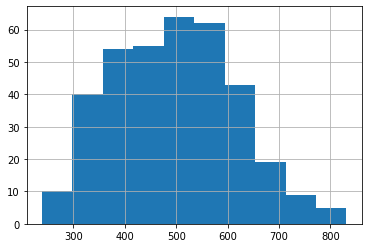

In [28]:
df_clean['hom_doloso'].hist();

**Gráfico de linhas para a variável `roubo_em_coletivo`**

O gráfico de linhas nos mostra que o roubo em coletivo estão auimentando desde 2015, quando os números eram próximos de 800 entre 2015 e 2020 os números tiveram um aumento de pouco mais de 100%, uma vez que a quantidade de roubos em coletivo ultrapassa 1600 casos por mês.

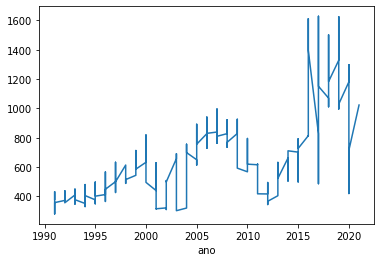

In [ ]:
df_clean['roubo_em_coletivo'].plot()

## Conclusão

Após a análise, fui capaz de observar que em **29 anos** muitas coisas mudaram, muitos dados saíram de um espectro alarmante, mas infelizmente alguns dados só pioraram e mostram que alguns crimes se tornaram mais frequentes.

Entretanto, cabe ao Governo e a Força Policial do Rio De Janeiro tornar a cidade mais segura e  fazer com que o lar da estátua do **Cristo Redentor** cada vez mais seja atrativo até mesmo para as pessoas que conhecem o Rio como um lugar violento, seja por meio de mais patrulhas, mais homens nas ruas e forças tarefas para combater as facções armadas, a população precisa disso, o País nescessita que a **"Cidade Maravilhosa"** seja realmente maravilhosa.

Consequentemente, o turismo pode aumentar e o medo diminuir, isso seria ótimo para o Estado, uma vez que tem passado por dificuldades, devido aos últimos anos, resolvendo esse problema talvez ocorra um efeito dominó e não apenas o setor da segurança melhore, mas outros também.